In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [88]:
# loadd all file from directory on editor

file_name = [file for file in os.listdir('SalesAnalysis/Sales_Data/')]

mearge_df = pd.DataFrame()

for l in file_name:
    df = pd.read_csv(f'SalesAnalysis/Sales_Data/{l}')
    mearge_df = pd.concat([mearge_df,df])
    

mearge_df.shape

(186850, 6)

In [89]:
mearge_df.to_csv('merge_data_sales/all_data.csv',index=False)

In [90]:
df = pd.read_csv('merge_data_sales/all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


 ### clean up the data
* to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [84]:
# find NAN

nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())
nan_df.shape

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


(545, 6)

In [85]:
 # drop na value

df = df.dropna(how='all')
df.shape

(186305, 6)

In [94]:
df = df[df['Order ID'] != 'Order ID']

In [95]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


In [96]:
df['Order Date'].str.split()[0][0]

'12/30/19'

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186495 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 14.0+ MB


In [126]:
# add month column

df['date'] = pd.to_datetime(df['Order Date'].str.split()[0][0])




/var/folders/gz/c4pp41hd2_lb8vgsrz9drfh40000gn/T/ipykernel_1315/153623288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['Order Date'].str.split()[0][0])


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  object        
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  object        
 7   date              185950 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 16.8+ MB


In [128]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,2019-12-30
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,2019-12-30
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,2019-12-30
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,2019-12-30
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,2019-12-30


In [129]:
df['month'] = df['Order Date'].str[:2]

/var/folders/gz/c4pp41hd2_lb8vgsrz9drfh40000gn/T/ipykernel_1315/1828455704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Order Date'].str[:2]


In [119]:
nan_df = df[df.isna().any(axis=1)]

In [118]:
df.drop(columns=['date'],inplace=True)

In [120]:
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df['month'].unique()

array(['12', '01', '04', '05', '02', '03', '08', '09', '06', '11', '10',
       '07'], dtype=object)

In [121]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [132]:
df['month'] = df['month'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  object        
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int32         
 7   date              185950 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 16.1+ MB


/var/folders/gz/c4pp41hd2_lb8vgsrz9drfh40000gn/T/ipykernel_1315/2324829600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].astype('int32')


In [136]:
# add sales column

df['sales' ] = df['Quantity Ordered'].astype(int) *df['Price Each'].astype(float)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,sales
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,2019-12-30,1700.00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,2019-12-30,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,2019-12-30,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,2019-12-30,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,2019-12-30,11.95


In [140]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'] )
df['Price Each']= pd.to_numeric(df['Price Each'] )
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  object        
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int32         
 7   date              185950 non-null  datetime64[ns]
 8   sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 17.5+ MB


In [173]:
# question 1

monthly_sales = df.groupby('month')[['Quantity Ordered','sales']].sum().reset_index()
monthly_sales.max()

month                    12.00
Quantity Ordered      28114.00
sales               4613443.34
dtype: float64

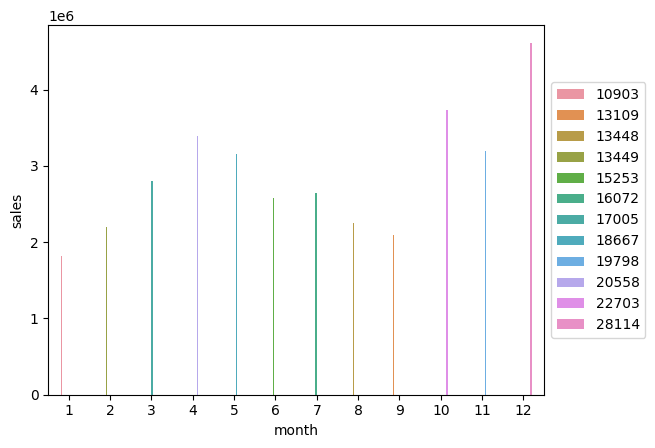

In [181]:
sns.barplot(data=monthly_sales,x='month',y='sales',hue='Quantity Ordered',width=0.4)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
# plt.tight_layout(rect=[0,0,0.85,1])

plt.show()

In [182]:
 # Question 2 : what city had the highest number of sales?

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,2019-12-30,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,2019-12-30,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,2019-12-30,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,2019-12-30,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,2019-12-30,11.95


In [200]:
# add column city

temp_city = df['Purchase Address'].str.split(',')
df['city'] = [i[-1].split()[0] for i in temp_city]

In [218]:
df['city name'] = df['Purchase Address'].apply(lambda x:x.split(',')[1])

In [219]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,sales,city,city name
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,2019-12-30,1700.00,NY,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,2019-12-30,600.00,NY,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,2019-12-30,11.95,NY,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,2019-12-30,149.99,CA,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,2019-12-30,11.95,GA,Atlanta


In [202]:
df['city'].unique()

array(['NY', 'CA', 'GA', 'OR', 'TX', 'MA', 'ME', 'WA'], dtype=object)

In [221]:
# sum of 
m_c_s = df.groupby(['city','city name'])[['sales']].sum().reset_index()

In [222]:
m_c_s

,city,city name,sales
0,CA,Los Angeles,5452570.80
1,CA,San Francisco,8262203.91
2,GA,Atlanta,2795498.58
3,MA,Boston,3661642.01
4,ME,Portland,449758.27
5,NY,New York City,4664317.43
6,OR,Portland,1870732.34
7,TX,Austin,1819581.75
8,TX,Dallas,2767975.40
9,WA,Seattle,2747755.48


In [223]:
m_c_s.max()

city                 WA
city name       Seattle
sales        8262203.91
dtype: object

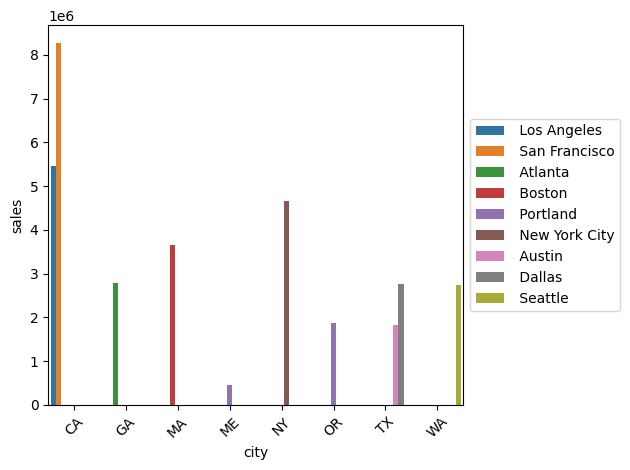

In [233]:
sns.barplot(data=m_c_s,x='city',y='sales',hue='city name',width=0.9)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

In [238]:
# question 3 : what time should we display advertisement to maximize likehood of customer's buying product?

df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,sales,city,city name
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,2019-12-30,1700.00,NY,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,2019-12-30,600.00,NY,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,2019-12-30,11.95,NY,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,2019-12-30,149.99,CA,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,2019-12-30,11.95,GA,Atlanta


In [244]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

/var/folders/gz/c4pp41hd2_lb8vgsrz9drfh40000gn/T/ipykernel_1315/3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [247]:
df.drop(columns = ['time'],axis=1,inplace=True)

In [248]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,sales,city,city name
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,2019-12-30,1700.00,NY,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,2019-12-30,600.00,NY,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,2019-12-30,11.95,NY,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,2019-12-30,149.99,CA,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,2019-12-30,11.95,GA,Atlanta


In [253]:
df['hour']= df['Order Date'].dt.hour
df['minute'] = df['Order Date'].dt.minute

In [254]:
df.groupby('hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,date,sales,city,city name,minute
hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


/Users/abhisingh/scipy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/abhisingh/scipy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


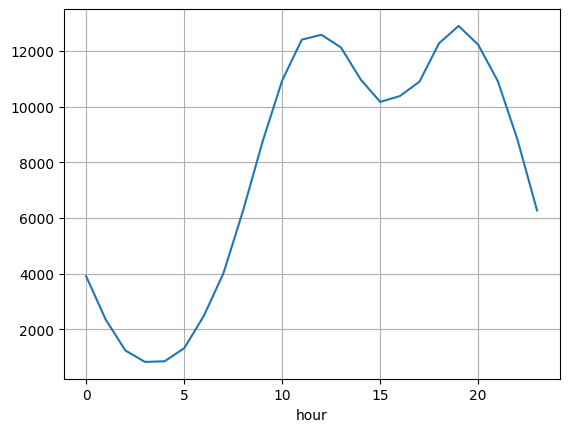

In [266]:
hourly_date = df.groupby('hour')['minute'].count()
sns.lineplot(x=hourly_date.index,y=hourly_date.values)
plt.grid()
plt.show()